<a href="https://colab.research.google.com/github/ahanab-0802/Machine-Learning-projects/blob/main/HousePriceProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Importing Necessary **Libraries**

In [45]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from xgboost import XGBRegressor


In [46]:
from sklearn.datasets import fetch_california_housing

house_price_dataset = fetch_california_housing()

Loading and importing California House price dataset


In [47]:
df=pd.DataFrame(house_price_dataset.data,columns=house_price_dataset.feature_names)

In [48]:
#print first 5 rows,columns feature is important
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [49]:
#add target column(house prices) to the dataset
df['price']=house_price_dataset.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [50]:
#checking number of rows and columns in dataset
df.shape

(20640, 9)

In [51]:
#check for missing values
df.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
price,0


In [52]:
#statiscial measures of the dataset
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


Understanding the correlation between various features in the datset

1.Positive correlation
2. Negative Correlation

In [53]:
#Correlation data
correlation = df.corr()

<Axes: >

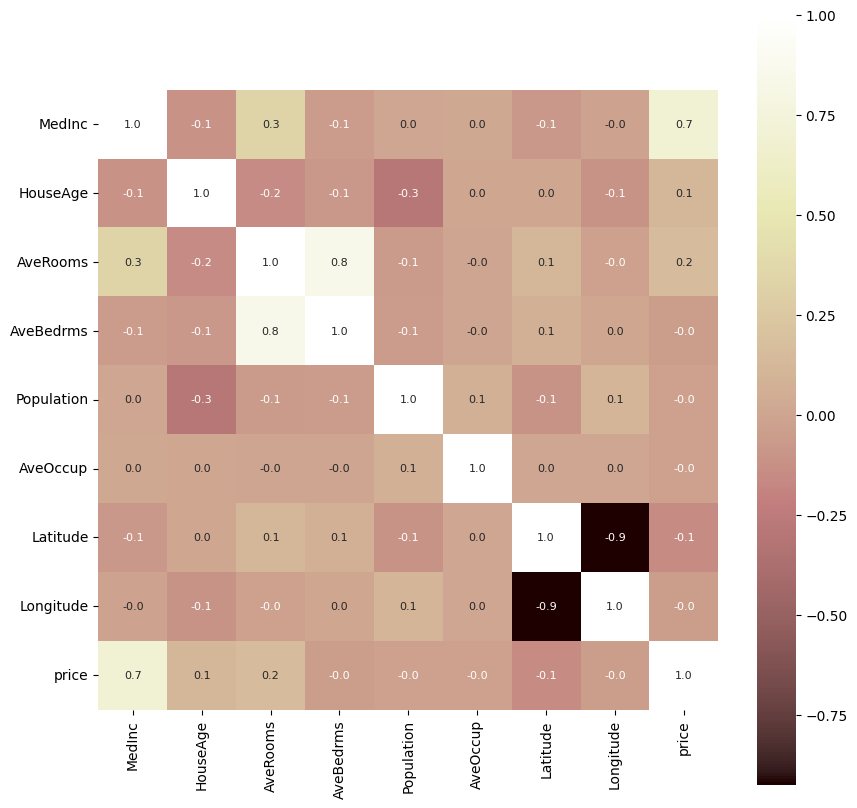

In [54]:
#constructing heatm  ap
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='pink')

Splitting the data and target

In [55]:
X = df.drop(['price'],axis=1) #axis=1 reprsents column;0 reprsents row
y = df['price']
print(X)
print(y)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.23  
1

Splitting into training and testing

In [56]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
print(X.shape,X_train.shape,X_test.shape)

(20640, 8) (16512, 8) (4128, 8)


Model Training

In [57]:
#XGBoost Regressor
#loading the model
model = XGBRegressor()


In [58]:
#training the model with X_train
model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

Evaluation

In [59]:
#Prediction on training data
training_data_prediction = model.predict(X_train)
print(training_data_prediction)

[0.5523039 3.0850039 0.5835302 ... 1.9204227 1.952873  0.6768683]


In [60]:
#R squared error for accuracy evaluation
score_1=metrics.r2_score(y_train,training_data_prediction)
#compares y_train(actual target data) and
#training_data_prediction(predicted target data)
print("R squared error : ",score_1)

#Mean Absolute Error
score_2=metrics.mean_absolute_error(y_train,training_data_prediction)
print("Mean Absolute Error : ",score_2)
 #>=5-10:Model not performing well else it is well

R squared error :  0.943650140819218
Mean Absolute Error :  0.1933648700612105


# **PREDICTION ON TEST DATA**

In [61]:
#Prediction on Test data
y_pred = model.predict(X_test)
print(y_pred)
#R squared error for accuracy evaluation
score_1=metrics.r2_score(y_test,y_pred)
#compares y_train(actual target data) and
#training_data_prediction(predicted target data)
print("R squared error : ",score_1)

#Mean Absolute Error
score_2=metrics.mean_absolute_error(y_test,y_pred)
print("Mean Absolute Error : ",score_2)
 #>=5-10:Model not performing well else it is well


[2.8649795  1.790346   0.92074925 ... 1.5385513  0.92647874 2.043316  ]
R squared error :  0.8338000331788725
Mean Absolute Error :  0.3108631800268186


# **VISUALIZING THE ACTUAL PRICES AND PREDICTED PRICES**

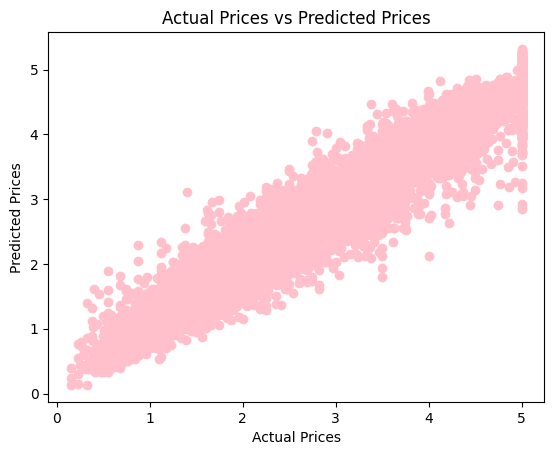

In [62]:
#1)FOR TRAINING DATA
plt.scatter(y_train,training_data_prediction,color='pink')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

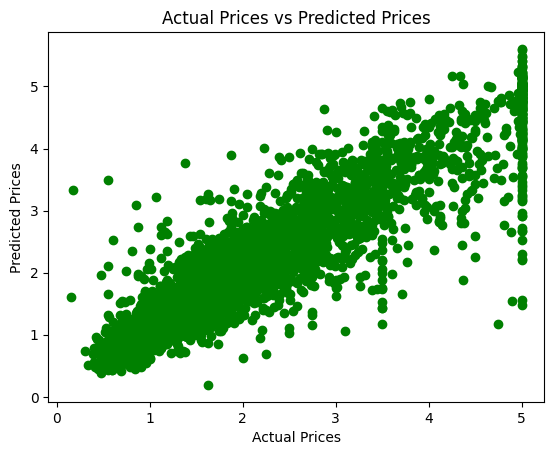

In [63]:
#2) FOR TEST DATA
plt.scatter(y_test,y_pred,color='green')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()